In [1]:
from google.colab import drive
drive.mount('/content/drive')
caminho_drive = '/content/drive/My Drive/colab/RLN/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download( 'popular' )
import pandas as pd
import numpy as np

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [0]:
texto0 = 'Eu gosto de assistir filmes de casamento entre cachorros belgas, mas apenas quando estou usando uma meia no pé esquerdo'
texto1 = 'A minha maior vontade na morte é comer macarrão de cabeça para baixo, para poder apreciar o nude do Trump'

In [24]:
from nltk.tokenize import word_tokenize

w_token0 = word_tokenize(texto0)
w_token1 = word_tokenize(texto1)

w_token0[:10]

['Eu',
 'gosto',
 'de',
 'assistir',
 'filmes',
 'de',
 'casamento',
 'entre',
 'cachorros',
 'belgas']

In [14]:
from nltk.tokenize import sent_tokenize

s_token0 = sent_tokenize(texto0)
s_token1 = sent_tokenize(texto1)

s_token0

['Eu gosto de assistir filmes de casamento entre cachorros belgas, mas apenas quando estou usando uma meia']

In [18]:
from nltk.corpus import stopwords

stw = stopwords.words('portuguese')

stw[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [20]:
from string import punctuation

pontuacao = list( punctuation )

pontuacao[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [30]:
stopwords_pt = set( stw + pontuacao ) #cria lista sem repetir elementos

list(stopwords_pt)[:10]

['houvesse',
 'me',
 'terei',
 '?',
 'nossa',
 'hajam',
 'aqueles',
 'estava',
 'sejamos',
 'numa']

In [33]:
w_token_0_sem_stopwords = [palavra for palavra in w_token0 if palavra not in stopwords_pt]

w_token_0_sem_stopwords[:10]

['Eu',
 'gosto',
 'assistir',
 'filmes',
 'casamento',
 'cachorros',
 'belgas',
 'apenas',
 'usando',
 'meia']

In [34]:
w_token_1_sem_stopwords = [palavra for palavra in w_token1 if palavra not in stopwords_pt]

w_token_1_sem_stopwords[:10]

['A',
 'maior',
 'vontade',
 'morte',
 'comer',
 'macarrão',
 'cabeça',
 'baixo',
 'poder',
 'apreciar']

In [46]:
nltk.download( 'rslp' )
from nltk.stem import RSLPStemmer
#ou
from nltk.stem.snowball import SnowballStemmer

stemmer = RSLPStemmer()
#stemmer = SnowballStemmer( 'portuguese' )

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [40]:
print(stemmer.stem( 'andar' ))
print(stemmer.stem( 'andei' ))
print(stemmer.stem( 'andando' ))
print(stemmer.stem( 'andarei' ))

and
and
and
and


In [42]:
w_token_0_sem_stopwords_stem = []
for palavra in w_token_0_sem_stopwords:
    w_token_0_sem_stopwords_stem.append( stemmer.stem( palavra ) )

w_token_0_sem_stopwords_stem[:10]

['eu', 'gost', 'assist', 'film', 'cas', 'cachorr', 'belg', 'apen', 'us', 'mei']

In [44]:
w_token_1_sem_stopwords_stem = []
for palavra in w_token_1_sem_stopwords:
    w_token_1_sem_stopwords_stem.append( stemmer.stem( palavra ) )

w_token_1_sem_stopwords_stem[:10]

['a',
 'mai',
 'vontad',
 'mort',
 'com',
 'macarr',
 'cabeç',
 'baix',
 'pod',
 'apreci']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer( analyzer='word' )

lista_textos = [ texto0, texto1 ]

In [50]:
vectorizer.fit( lista_textos )

vectorizer.vocabulary_

{'apenas': 0,
 'apreciar': 1,
 'assistir': 2,
 'baixo': 3,
 'belgas': 4,
 'cabeça': 5,
 'cachorros': 6,
 'casamento': 7,
 'comer': 8,
 'de': 9,
 'do': 10,
 'entre': 11,
 'esquerdo': 12,
 'estou': 13,
 'eu': 14,
 'filmes': 15,
 'gosto': 16,
 'macarrão': 17,
 'maior': 18,
 'mas': 19,
 'meia': 20,
 'minha': 21,
 'morte': 22,
 'na': 23,
 'no': 24,
 'nude': 25,
 'para': 26,
 'poder': 27,
 'pé': 28,
 'quando': 29,
 'trump': 30,
 'uma': 31,
 'usando': 32,
 'vontade': 33}

In [51]:
BOW = vectorizer.transform( lista_textos )

BOW

<2x34 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [52]:
BOW.toarray()

array([[1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1]])

In [53]:
dataset = pd.read_csv( caminho_drive + 'imdb-reviews-pt-br.csv', encoding='utf-8' )

dataset.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [60]:
df_pt = dataset[ ['text_pt', 'sentiment'] ]

df_pt.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


In [56]:
df_pt.sentiment.unique()

array(['neg', 'pos'], dtype=object)

In [61]:
df_pt.sentiment.replace( {'neg':0, 'pos':1}, inplace=True )

df_pt.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [0]:
reviews = df_pt.text_pt.values #X
sentiments = df_pt.sentiment.values #Y

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( reviews, sentiments, test_size=0.2, random_state=42 )

In [72]:
vectorizer = CountVectorizer( analyzer='word' )

vectorizer.fit(reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
BOW_x_train = vectorizer.transform( x_train )
BOW_x_test = vectorizer.transform( x_test )

In [74]:
BOW_x_train

<39567x129621 sparse matrix of type '<class 'numpy.int64'>'
	with 5306324 stored elements in Compressed Sparse Row format>

In [75]:
BOW_x_test

<9892x129621 sparse matrix of type '<class 'numpy.int64'>'
	with 1314176 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.naive_bayes import MultinomialNB

modelo = MultinomialNB()
modelo.fit( BOW_x_train, y_train )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
frase0 = 'Belo filme, achei o final emocionante'
frase1 = 'Esperava mais desse diretor, já foi melhor'

lista_frases = [frase0, frase1]

teste = vectorizer.transform( lista_frases ).toarray()
saida = modelo.predict( teste )

saida

array([1, 0])

In [84]:
print( modelo.score( BOW_x_train, y_train ) )
print( modelo.score( BOW_x_test, y_test ) )

0.9039350974296763
0.8500808734330773


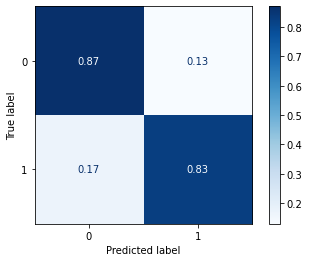

In [87]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix( estimator=modelo, X=BOW_x_test, y_true=y_test, cmap=plt.cm.Blues, normalize='true' )
plt.grid(False)